In [277]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [278]:
train=pd.read_csv(r'D:\python\Energy-consumption-prediction\train_energy_data.csv')
test=pd.read_csv(r'D:\python\Energy-consumption-prediction\test_energy_data.csv')

In [279]:
data=pd.concat([train, test], ignore_index=True)

In [280]:
train.shape

(1000, 7)

In [281]:
test.shape

(100, 7)

In [282]:
data.shape

(1100, 7)

In [283]:
data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.3+ KB


In [285]:
data.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,25500.527273,48.268182,25.730000,22.559745,4168.191273
std,14236.955632,29.127624,14.116209,7.122357,924.278723
min,560.000000,1.000000,1.000000,10.050000,1683.950000
25%,13203.750000,22.000000,13.000000,16.365000,3510.460000
50%,25785.500000,47.000000,26.000000,22.810000,4189.690000
75%,37536.750000,73.000000,38.000000,28.760000,4859.510000
max,49997.000000,99.000000,49.000000,34.990000,6530.600000


In [286]:
data.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [287]:
data.duplicated().sum()

np.int64(0)

<Axes: ylabel='Building Type'>

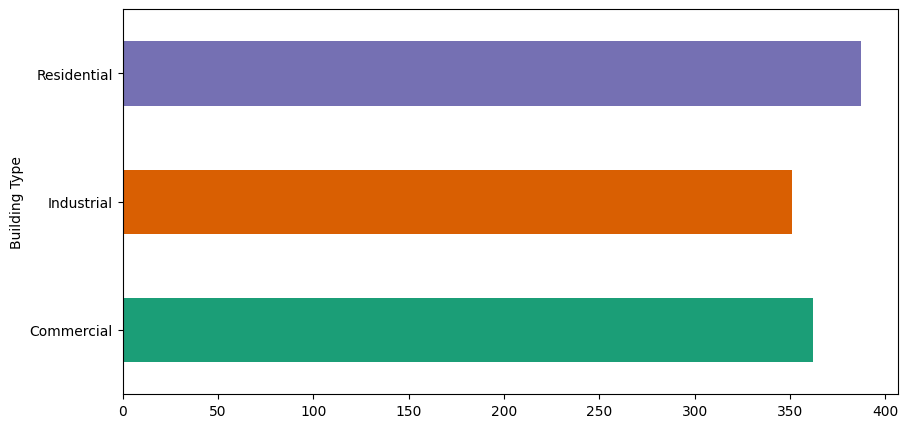

In [288]:
data.groupby('Building Type').size().plot(kind='barh', figsize=(10, 5), color=sns.palettes.mpl_palette('Dark2'))

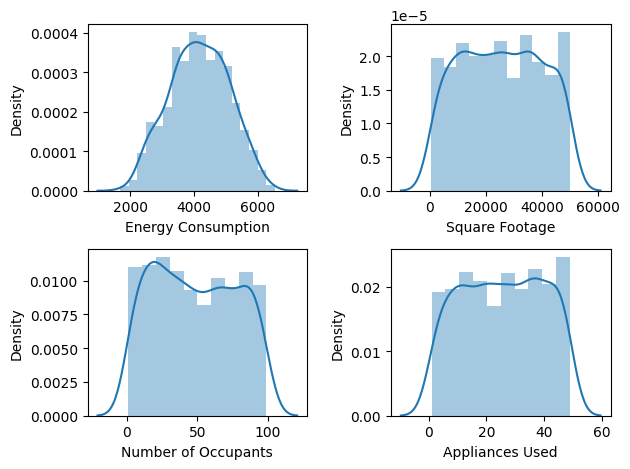

In [289]:
plt.figsize=(12,16)
plt.subplot(2,2,1)
sns.distplot(train['Energy Consumption'])
plt.subplot(2,2,2)
sns.distplot(train['Square Footage'])
plt.subplot(2,2,3)
sns.distplot(train['Number of Occupants'])
plt.subplot(2,2,4)
sns.distplot(train['Appliances Used'])

plt.tight_layout()
plt.show()

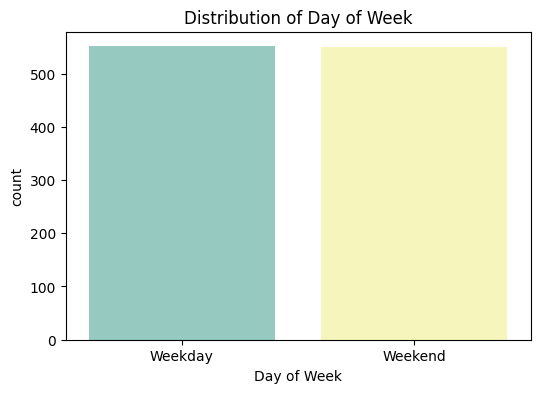

In [290]:
plt.figure(figsize=(6,4))
sns.countplot(x="Day of Week", data=data, palette="Set3")
plt.title("Distribution of Day of Week")
plt.show()

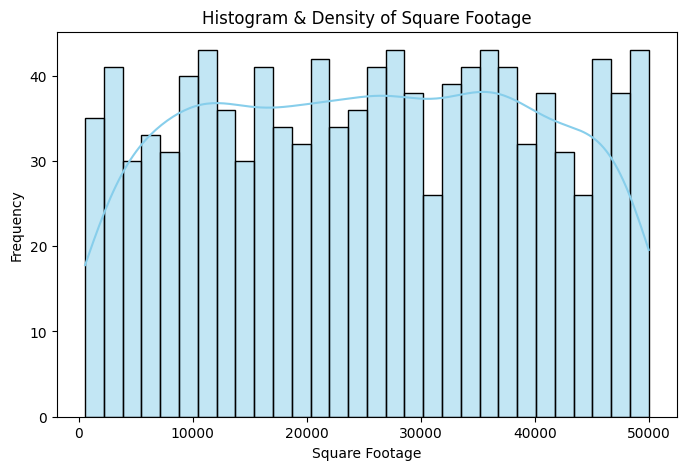

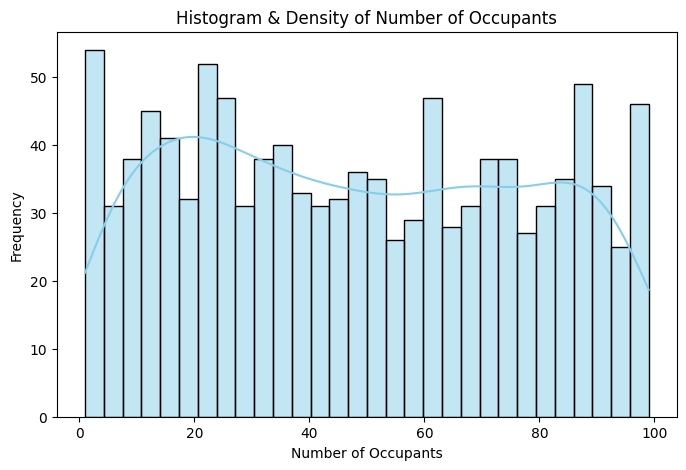

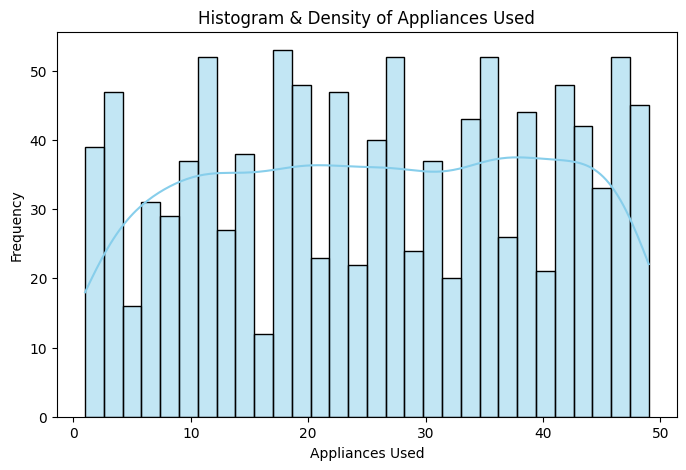

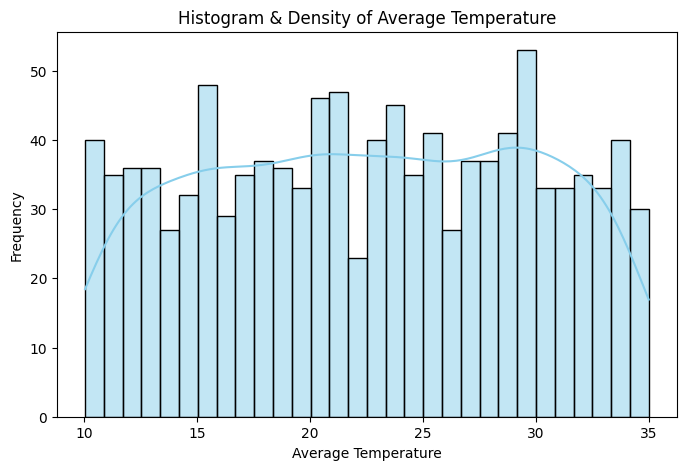

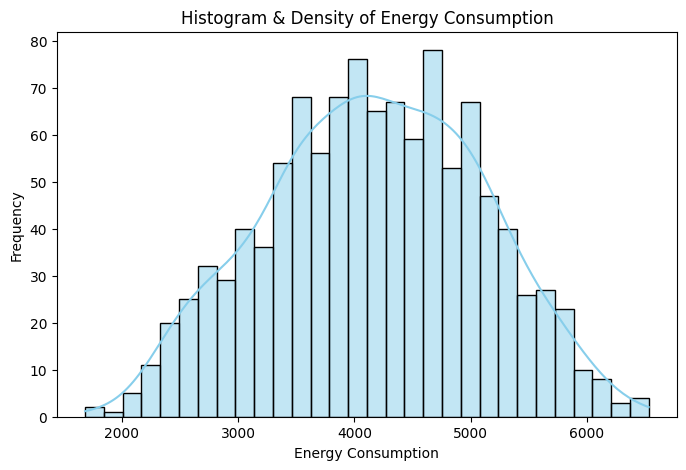

In [291]:
num_cols = ["Square Footage", "Number of Occupants", "Appliances Used", 
            "Average Temperature", "Energy Consumption"]

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(data[col], kde=True, color="skyblue", bins=30)
    plt.title(f"Histogram & Density of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

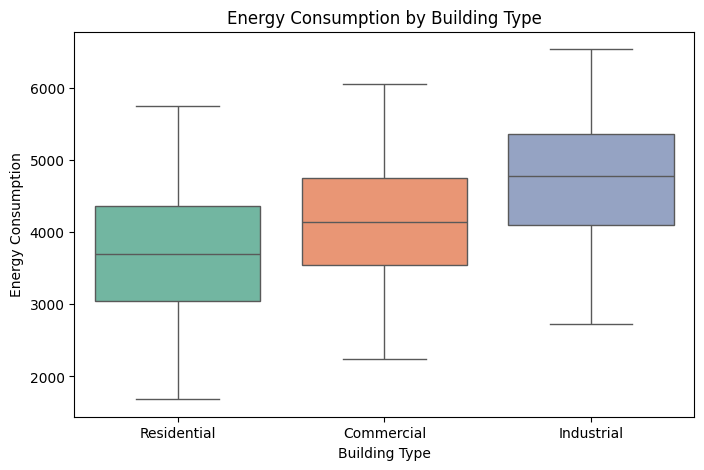

In [292]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Building Type", y="Energy Consumption", data=data, palette="Set2")
plt.title("Energy Consumption by Building Type")
plt.show()


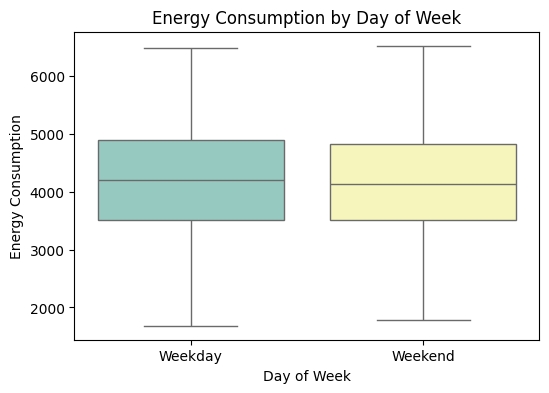

In [293]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Day of Week", y="Energy Consumption", data=data, palette="Set3")
plt.title("Energy Consumption by Day of Week")
plt.show()

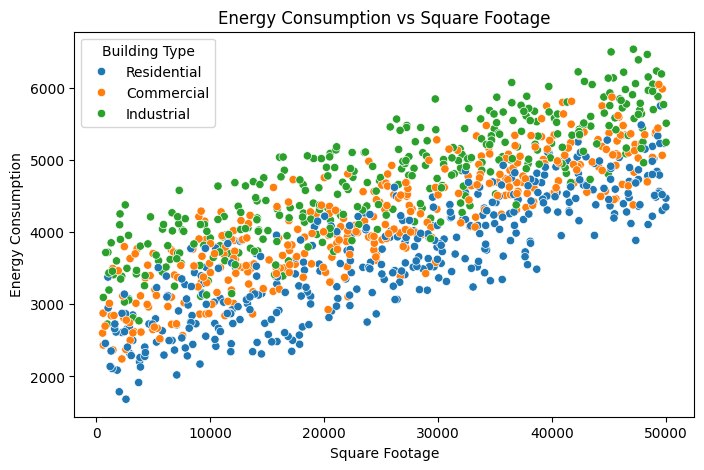

In [294]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Square Footage", y="Energy Consumption", hue="Building Type", data=data)
plt.title("Energy Consumption vs Square Footage")
plt.show()

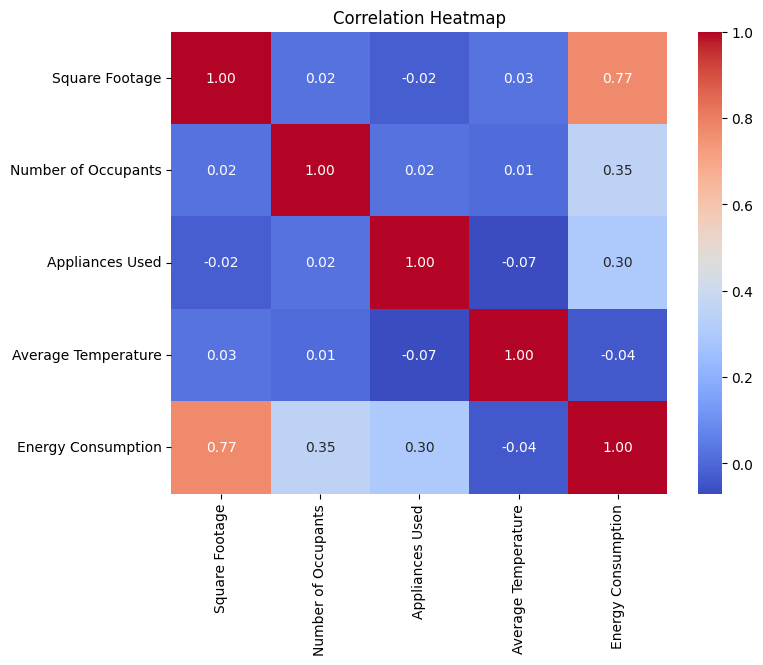

In [295]:
plt.figure(figsize=(8,6))
corr = data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [296]:
# mapping the building type with numerical value
building_mp = {'Residential':1, 'Commercial':2, 'Industrial':3}
print(building_mp)

data['Building Type'] = data['Building Type'].map(building_mp)
data

{'Residential': 1, 'Commercial': 2, 'Industrial': 3}


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,1,7063,76,10,29.84,Weekday,2713.95
1,2,44372,66,45,16.72,Weekday,5744.99
2,3,19255,37,17,14.30,Weekend,4101.24
3,1,13265,14,41,32.82,Weekday,3009.14
4,2,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
1095,2,1161,81,11,15.45,Weekend,3010.81
1096,1,37943,50,23,21.73,Weekend,4248.49
1097,2,1558,27,29,16.86,Weekend,2843.60
1098,3,2145,56,12,11.77,Weekend,3348.39


In [297]:
# mapping the weektype with numerical value
week_mp = {'Weekday':1, 'Weekend':2}

data['Day of Week'] = data['Day of Week'].map(week_mp)
data

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,1,7063,76,10,29.84,1,2713.95
1,2,44372,66,45,16.72,1,5744.99
2,3,19255,37,17,14.30,2,4101.24
3,1,13265,14,41,32.82,1,3009.14
4,2,13375,26,18,11.92,1,3279.17
...,...,...,...,...,...,...,...
1095,2,1161,81,11,15.45,2,3010.81
1096,1,37943,50,23,21.73,2,4248.49
1097,2,1558,27,29,16.86,2,2843.60
1098,3,2145,56,12,11.77,2,3348.39


In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   int64  
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   int64  
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 60.3 KB


<Axes: >

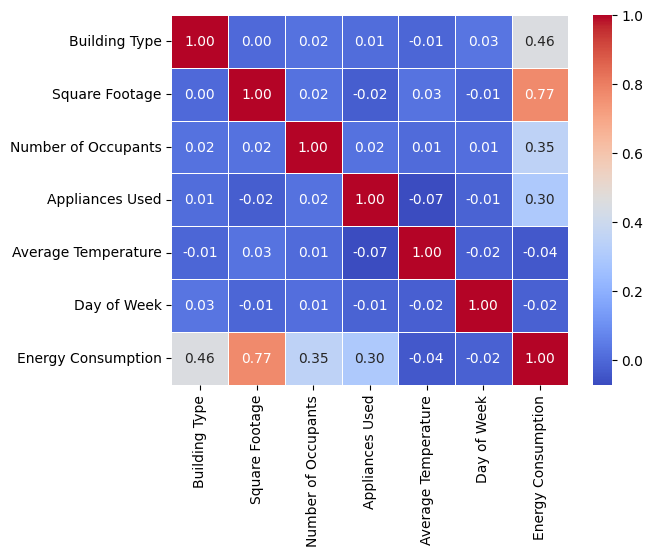

In [299]:
corr=data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [300]:
x= data.drop('Energy Consumption', axis=1)
y= data['Energy Consumption']

In [301]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [302]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(880, 6)
(220, 6)
(880,)
(220,)


In [303]:
from sklearn.linear_model import LinearRegression

model_lr=LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [304]:
y_pred=model_lr.predict(x_test)

In [305]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 0.01
MSE: 0.00
RMSE: 0.01
R²: 1.0000


In [306]:
combined_outputs = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
combined_outputs

,Actual,Predicted
471,5228.59,5228.599910
690,2727.89,2727.900915
494,4002.72,4002.700232
253,4277.54,4277.549615
885,3542.19,3542.201064
...,...,...
811,2998.57,2998.550912
949,4370.44,4370.448938
419,4682.41,4682.399742
916,6146.35,6146.349089


In [307]:
import joblib

joblib.dump(model_lr,'model_lr.plt')

['model_lr.plt']

In [308]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.4f}")

Random Forest:
MAE: 103.08
MSE: 17001.71
RMSE: 130.39
R²: 0.9789


In [309]:
joblib.dump(rf,'model_rf.plt')

['model_rf.plt']

In [310]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree:")
print(f"MAE: {mae_dt:.2f}")
print(f"MSE: {mse_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R²: {r2_dt:.4f}")

Decision Tree:
MAE: 179.50
MSE: 50004.73
RMSE: 223.62
R²: 0.9380


In [311]:
joblib.dump(dt,'model_dt.plt')

['model_dt.plt']

In [312]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting:")
print(f"MAE: {mae_gbr:.2f}")
print(f"MSE: {mse_gbr:.2f}")
print(f"RMSE: {rmse_gbr:.2f}")
print(f"R²: {r2_gbr:.4f}")

Gradient Boosting:
MAE: 68.28
MSE: 6999.56
RMSE: 83.66
R²: 0.9913


In [313]:
joblib.dump(gbr,'model_gbr.plt')

['model_gbr.plt']